In [57]:
import os
import json
import shutil
import requests
from PIL import Image
import pandas as pd

## Parse metadata

In [11]:
with open('../data/meebits/metadata.json', 'r') as f:
    metadata = json.loads(f.read())
    f.close()

In [12]:
metadata['result'][0].keys()

dict_keys(['token_id', 'token_address', 'token_uri', 'metadata', 'contract_type', 'token_hash', 'minter_address', 'block_number_minted', 'transaction_minted', 'synced_at', 'created_at'])

In [13]:
metadata['result'][0]['token_id']

'4563'

In [33]:
print(metadata['result'][0])

{'token_id': '4563', 'token_address': '0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7', 'token_uri': 'https://meebits.larvalabs.com/meebit/4563', 'metadata': '{\n  "name": "Meebit #4563",\n  "description": "Meebit #4563",\n  "image": "http://meebits.larvalabs.com/meebitimages/characterimage?index\\u003d4563\\u0026type\\u003dfull\\u0026imageType\\u003djpg",\n  "attributes": [\n    {\n      "trait_type": "Type",\n      "value": "Human"\n    },\n    {\n      "trait_type": "Hair Style",\n      "value": "Big Bangs"\n    },\n    {\n      "trait_type": "Hair Color",\n      "value": "Brown"\n    },\n    {\n      "trait_type": "Shirt",\n      "value": "Tee"\n    },\n    {\n      "trait_type": "Shirt Color",\n      "value": "Black"\n    },\n    {\n      "trait_type": "Pants",\n      "value": "Trackpants"\n    },\n    {\n      "trait_type": "Pants Color",\n      "value": "Dark Gray"\n    },\n    {\n      "trait_type": "Shoes",\n      "value": "Canvas"\n    },\n    {\n      "trait_type": "Shoes Color"

## Extract Metadata

In [37]:
def _extract_key(json_object: dict, key_to_extract: str):
    """
    Helper function that attempts to extract `key_to_extract`
    from `json_object`. Implements Try/Except logic.
    
    Arguments:
        json_object (dict): Dictionary/JSON object.
        key_to_extract (str): Key to attempt to extract
                              `json_object`.
                              
    Returns:
        str: Key value from `json_object` if exists else None.
    
    """
    
    extracted_value = None 
    
    try:
        extracted_value = json_object[key_to_extract]
    except KeyError as e:
        print(f'key_to_extract does not exist in json_object: {e}')
    except Exception as e:
        print(f'Unknown Error: {e}')
    
    return extracted_value

def extract_metadata(meebit_json: dict):
    """
    Given the JSON Response of a Meebit,
    this function extracts the important 
    information from it: 
        * Token ID
        * Name
        * Description
        * Attributes
        * Original Token Address
        
    Arguments:
        meebit_json (dict): JSON Response object containing 
                            Meebit Metadata.
                            
    Returns:
        dict: Dictionary containing key fields from `meebit_json`.
    
    """
    
    token_id = _extract_key(meebit_json, 'token_id')
    metadata = _extract_key(meebit_json, 'metadata')
    original_token_address = _extract_key(meebit_json, 'token_address')
    metadata = json.loads(metadata)
    name = _extract_key(metadata, 'name')
    description = _extract_key(metadata, 'description')
    attributes = _extract_key(metadata, 'attributes')
    
    important_information = {
        'token_id': token_id,
        'original_token_address': original_token_address,
        'name': name,
        'description': description,
        'attributes': attributes,
    }
    
    return important_information

In [38]:
extract_metadata(meebit_json=metadata['result'][0])

{'token_id': '4563',
 'original_token_address': '0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7',
 'name': 'Meebit #4563',
 'description': 'Meebit #4563',
 'attributes': [{'trait_type': 'Type', 'value': 'Human'},
  {'trait_type': 'Hair Style', 'value': 'Big Bangs'},
  {'trait_type': 'Hair Color', 'value': 'Brown'},
  {'trait_type': 'Shirt', 'value': 'Tee'},
  {'trait_type': 'Shirt Color', 'value': 'Black'},
  {'trait_type': 'Pants', 'value': 'Trackpants'},
  {'trait_type': 'Pants Color', 'value': 'Dark Gray'},
  {'trait_type': 'Shoes', 'value': 'Canvas'},
  {'trait_type': 'Shoes Color', 'value': 'Black'},
  {'trait_type': 'Necklace', 'value': 'Gold Necklace'}]}

## Get Image

In [39]:
def get_meebit_image_url(meebit_index: int):
    """
    Given a meebit index returns the URL for 
    that particular meebit.
    
    Arguments:
        meebit_index (int): # of the meebit.
        
    Returns:
        str: URL for that meebit.
    
    """
    
    return f'https://meebits.larvalabs.com/meebitimages/characterimage?index={meebit_index}&type=full'

In [40]:
def download_image(url: str, filename: str):
    """
    Given a `url` to an image, this function 
    downloads the image to `filename`.
    
    Arguments:
        url (str): URL to an image.
        filename (str): path to the file save location.
    
    Returns:
        int: HTTP response code of the HTTP GET request.
    
    """
    
    if os.path.isdir(filename):
        filepath, filename = os.path.split(filename)
        os.makedirs(filepath) if not os.path.exists(filepath) else True
        filename = os.path.join(filepath, filename)
    
    
    response = requests.get(url, stream = True)
    if response.status_code == 200:
        response.raw.decode_content = True
        with open(filename, 'wb') as f:
            shutil.copyfileobj(response.raw, f) 
            f.close()
    
    return response.status_code
    

In [20]:
token_id = metadata['result'][0]['token_id']
url = get_meebit_image_url(token_id)
print(url)
status_code = download_image(url, f'../data/meebits/images/{token_id}.png')
print(status_code)

https://meebits.larvalabs.com/meebitimages/characterimage?index=4563&type=full
200


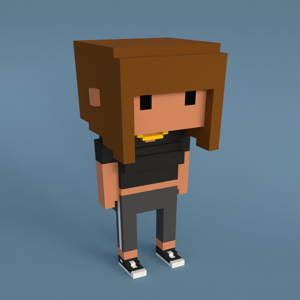

In [51]:
image = Image.open(f'../data/meebits/images/{token_id}.png')
image.resize((300,300))

In [101]:
meebit_metadata = extract_metadata(meebit_json=metadata['result'][0])
attributes = meebit_metadata.pop('attributes')

In [102]:
meebit_metadata, attributes

({'token_id': '4563',
  'original_token_address': '0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7',
  'name': 'Meebit #4563',
  'description': 'Meebit #4563'},
 [{'trait_type': 'Type', 'value': 'Human'},
  {'trait_type': 'Hair Style', 'value': 'Big Bangs'},
  {'trait_type': 'Hair Color', 'value': 'Brown'},
  {'trait_type': 'Shirt', 'value': 'Tee'},
  {'trait_type': 'Shirt Color', 'value': 'Black'},
  {'trait_type': 'Pants', 'value': 'Trackpants'},
  {'trait_type': 'Pants Color', 'value': 'Dark Gray'},
  {'trait_type': 'Shoes', 'value': 'Canvas'},
  {'trait_type': 'Shoes Color', 'value': 'Black'},
  {'trait_type': 'Necklace', 'value': 'Gold Necklace'}])

In [103]:
attributes = pd.DataFrame(attributes).T.reset_index(drop=True)
attributes

,0,1,2,3,4,5,6,7,8,9
0,Type,Hair Style,Hair Color,Shirt,Shirt Color,Pants,Pants Color,Shoes,Shoes Color,Necklace
1,Human,Big Bangs,Brown,Tee,Black,Trackpants,Dark Gray,Canvas,Black,Gold Necklace


In [104]:
columns = attributes.loc[0]
attributes.drop(0, inplace=True)
attributes.columns = columns
attributes.reset_index(drop=True, inplace=True)
attributes

,Type,Hair Style,Hair Color,Shirt,Shirt Color,Pants,Pants Color,Shoes,Shoes Color,Necklace
0,Human,Big Bangs,Brown,Tee,Black,Trackpants,Dark Gray,Canvas,Black,Gold Necklace


In [105]:
other_meta = pd.DataFrame.from_dict(meebit_metadata, orient='index').T
other_meta

,token_id,original_token_address,name,description
0,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Meebit #4563


In [106]:
pd.merge(left=attributes, right=other_meta, left_index=True, right_index=True, how='inner')

,Type,Hair Style,Hair Color,Shirt,Shirt Color,Pants,Pants Color,Shoes,Shoes Color,Necklace,token_id,original_token_address,name,description
0,Human,Big Bangs,Brown,Tee,Black,Trackpants,Dark Gray,Canvas,Black,Gold Necklace,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Meebit #4563


In [107]:
df = pd.read_csv("../data/meebits/metadata.csv")

In [108]:
df.head()

,Type,Hair Style,Hair Color,Shirt,Shirt Color,Pants,Pants Color,Shoes,Shoes Color,Necklace,...,description,Beard,Beard Color,Hat,Hat Color,Tattoo Motif,Glasses,Overshirt,Earring,Glasses Color
0,Human,Big Bangs,Brown,Tee,Black,Trackpants,Dark Gray,Canvas,Black,Gold Necklace,...,Meebit #4563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Human,Buzzcut,Dark,Bare Chest,NaN,Athletic Shorts,Green,Classic,Black,NaN,...,Meebit #4306,Full,Dark,Headphones,Gray,"BCLDL,BCLDL",NaN,NaN,NaN,NaN
2,Human,Simple,Dark,Suit,NaN,Ripped Jeans,NaN,Classic,White,NaN,...,Meebit #5680,NaN,NaN,Backwards Cap,Red,NaN,NaN,NaN,NaN,NaN
3,Human,Ponytail,Brown,Oversized Hoodie,Purple,Skirt,Camo,High Boots,NaN,NaN,...,Meebit #19343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Human,Messy,Dark,Hoodie,Camo,Regular Pants,Dark Gray,Running,Black,NaN,...,Meebit #9904,Big,Dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.fillna(0, inplace=True)

In [125]:
columns_to_exclude = list(other_meta.columns)
excluded_df = df[columns_to_exclude]
excluded_df.head()

,token_id,original_token_address,name,description
0,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Meebit #4563
1,4306,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4306,Meebit #4306
2,5680,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #5680,Meebit #5680
3,19343,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #19343,Meebit #19343
4,9904,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #9904,Meebit #9904


In [126]:
oh_df = pd.get_dummies(df.drop(columns_to_exclude, axis=1))
oh_df.head()

,Type_Human,Hair Style_Big Bangs,Hair Style_Buzzcut,Hair Style_Messy,Hair Style_Ponytail,Hair Style_Simple,Hair Style_Straight,Hair Style_Very Long,Hair Color_Auburn,Hair Color_Brown,...,Glasses_0,Glasses_Aviators,Glasses_Specs,Glasses_Sunglasses,Overshirt_0,Overshirt_Trenchcoat,Earring_0,Earring_Gold Hoops,Glasses Color_0,Glasses Color_Charcoal
0,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [127]:
pd.merge(left=excluded_df, right=oh_df, left_index=True, right_index=True, how='inner')

,token_id,original_token_address,name,description,Type_Human,Hair Style_Big Bangs,Hair Style_Buzzcut,Hair Style_Messy,Hair Style_Ponytail,Hair Style_Simple,...,Glasses_0,Glasses_Aviators,Glasses_Specs,Glasses_Sunglasses,Overshirt_0,Overshirt_Trenchcoat,Earring_0,Earring_Gold Hoops,Glasses Color_0,Glasses Color_Charcoal
0,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Meebit #4563,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,4306,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4306,Meebit #4306,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,5680,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #5680,Meebit #5680,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,19343,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #19343,Meebit #19343,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4,9904,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #9904,Meebit #9904,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
5,5527,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #5527,Meebit #5527,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,1,0
6,7807,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #7807,Meebit #7807,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,12990,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #12990,Meebit #12990,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
8,14799,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #14799,Meebit #14799,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
9,5743,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #5743,Meebit #5743,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [138]:
df = pd.read_csv("../data/meebits/metadata.csv")

In [139]:
df.head()

,token_id,original_token_address,name,Type,Hair Style,Hair Color,Shirt,Shirt Color,Pants,Pants Color,...,Necklace,Beard,Beard Color,Hat,Hat Color,Tattoo Motif,Glasses,Overshirt,Earring,Glasses Color
0,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Human,Big Bangs,Brown,Tee,Black,Trackpants,Dark Gray,...,Gold Necklace,0,0,0,0,0,0,0,0,0
1,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Human,Buzzcut,Dark,Bare Chest,0,Athletic Shorts,Green,...,0,Full,Dark,Headphones,Gray,"BCLDL,BCLDL",0,0,0,0
2,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Human,Simple,Dark,Suit,0,Ripped Jeans,0,...,0,0,0,Backwards Cap,Red,0,0,0,0,0
3,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Human,Ponytail,Brown,Oversized Hoodie,Purple,Skirt,Camo,...,0,0,0,0,0,0,0,0,0,0
4,4563,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7,Meebit #4563,Human,Messy,Dark,Hoodie,Camo,Regular Pants,Dark Gray,...,0,Big,Dark,0,0,0,0,0,0,0


In [147]:
with open('../data/meebits/metadata.json', 'r') as f:
    data = f.read()
    f.close()

In [148]:
d = json.loads(data)

In [149]:
len(d)

20000